# data analysis summry:

after looking at the data and following the directions i had to drop the duplicated mice the way i did this was focus on the the Timepoints and Tumor Volumes (3mm). this was done so that mouse g989's data would be removed so that the data set could be analyzed correctly. the regiments of Capomulin and Ramicane seemed to have the best effect in reducing the tumor size i did also find that Capomulin worked well on the female mice more than it did with the male mice, the amounts given of each drug seemed to be about the same  aside from Capomulin and Ramicane and the duration of time given was the same in most mice Ramicane and Capomulin having been given a slightly larger amount could give the impression of being more effective because of the larger effect on the Tumor Volume, a few Limitation are sample size, a control mouse, in varying doses and times given and pre-existing conditions .


In [159]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_datX = pd.read_csv("Data/Mouse_metadata.csv")
study_datX = pd.read_csv("Data/Study_results.csv")

# Combine the data into a single dataset
comb_datX_df = pd.merge(mouse_datX, study_datX, on="Mouse ID", how="outer")

In [160]:
#See headers for both datasets
mouse_datX.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [161]:
#See headers for both datasets
study_datX

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [162]:
# Display the data table for preview
comb_datX_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [163]:
comb_datX_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [164]:
#Calculate total Mice
total_mouse = mouse_datX['Mouse ID'].unique()
len(total_mouse)

249

In [165]:
#get duplicates of mouse id and timepoint
dupl_df = comb_datX_df.loc[comb_datX_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupl_df


array(['g989'], dtype=object)

In [166]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
show_duplicates = comb_datX_df[comb_datX_df.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_df = comb_datX_df.loc[comb_datX_df['Mouse ID'] == 'g989', :] 
dupli_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [168]:
duple_mice_true = dupli_df.index
duple_mice_true

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [169]:
#create df with a dropped mouse id
dropped_mouse_dfX = comb_datX_df.drop_duplicates(subset=['Mouse ID', "Timepoint"], keep=False)

In [170]:
dropped_mouse_dfX.count()

Mouse ID              1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
dtype: int64

In [171]:
#just playing with some stuff did some testing to see if worked
#dropped_mouse_dfX.iloc[900:930] 
#dropped_mouse_dfX = comb_datX_df.loc[comb_datX_df['Mouse ID']!= 'g989']
#comb_datX_df.head(911)


#worked with classmate and TA's to get the code working 

In [172]:
#calculate new total of mice
new_total_mice = dropped_mouse_dfX['Mouse ID'].nunique()
new_total_mice


249

In [173]:
# Checking the number of mice in the dropped_mouse_dfX. It should be 1893 - 10
comb_datX_df['Mouse ID'] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [174]:
# Checking the number of mice in the dropped_mouse_dfX. It should be 1893 - 10
dropped_mouse_dfX['Mouse ID'] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1883, dtype: bool

## Summary Statistics

In [175]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = dropped_mouse_dfX.groupby(["Drug Regimen"])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

Average_tumor_volume  = round(drug_groups["Tumor Volume (mm3)"].mean(),4)


# Get the median of tumor volume

Median_tumor_volume = round(drug_groups["Tumor Volume (mm3)"].median(),4)


# Get the variance of tumor volume
Variance_tumor_volume = round(drug_groups["Tumor Volume (mm3)"].var(),4)


#Get the standard deviation of tumor volume
Sdev_tumor_volume = round(drug_groups["Tumor Volume (mm3)"].std(),4)


#Get the SEM of tumor volume
SEM_tumor_volume = round(drug_groups["Tumor Volume (mm3)"].sem(),4)


#Create a new dataframe with new information
Drug_Summary_DF = pd.DataFrame({ "Mean Tumor Volume":Average_tumor_volume, 
                                 "Median Tumor Volume": Median_tumor_volume, 
                                 "Variance Tumor Volume": Variance_tumor_volume, 
                                 "Standard Deviation Tumor Volume": Sdev_tumor_volume,
                                  "SEM Tumor Volume":SEM_tumor_volume
    
    
})

Drug_Summary_DF



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.4583,50.8546,44.0537,6.6373,0.5401
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Drug_Summary_DF = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),3)

Drug_Summary_DF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.458,50.855,44.054,6.637,0.540
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [177]:
#Change names of dataframe columns
Drug_Summary_DF = Drug_Summary_DF.rename(columns={"mean": "Mean Tumor-Volume",
                                                  "median": "Median Tumor-Volume",
                                                   "var": "Variance Tumor-Volume",
                                                   "std":"Standard Dev Tumor-Volume ", 
                                                   "sem":"SM Tumor-Volume"})
Drug_Summary_DF

,Mean Tumor-Volume,Median Tumor-Volume,Variance Tumor-Volume,Standard Dev Tumor-Volume,SM Tumor-Volume
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.458,50.855,44.054,6.637,0.540
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Msmt per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total # of Mice'>

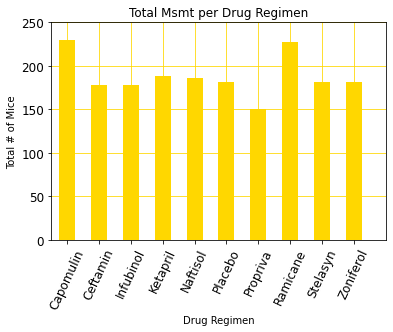

In [178]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_regimen = drug_groups["Mouse ID"].count()
drug_pdplot_1 = Drug_regimen.plot.bar( rot = 65, title = "Total Msmt per Drug Regimen", fontsize =12, color = "gold")
drug_pdplot_1.set_xlabel("Drug Regimen")
drug_pdplot_1.set_ylabel("Total # of Mice")
plt.xlim(-0.5, len(x_axis_1))
plt.ylim(0, 250)
plt.grid(zorder=0, color ='gold')
drug_pdplot_1

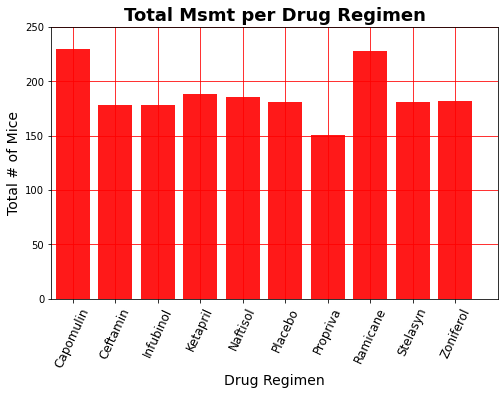

In [179]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
x_axis_1 = np.arange(len(Drug_regimen))
y_axis_1 = Drug_regimen

#Make ticks 
tx = list(Drug_regimen.index.values)
tick_locations = [value for value in x_axis_1]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis_1, y_axis_1, color ='red', alpha=0.9, align="center")
plt.xticks(tick_locations, tx, rotation="65", fontsize = 12)

# Set x and y limits
plt.xlim(-0.5, len(x_axis_1))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Msmt per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Total # of Mice",fontsize=14)
plt.grid(zorder=0, color ='red')

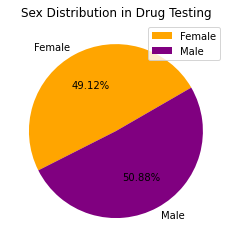

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#make female and male mice 
mouse_M_F = dropped_mouse_dfX.groupby(["Sex"]).count()

mice_pie_Chart = mouse_M_F.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                                colors = ["orange","purple"],autopct = "%.2f%%",startangle=30)

mice_pie_Chart.set_ylabel("")
mice_pie_Chart.legend(loc='upper right', frameon=True,)


# Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_MAX = dropped_mouse_dfX.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_MAX

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [182]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = pd.merge(timepoint_MAX , dropped_mouse_dfX, on=(["Mouse ID","Timepoint"]))
timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_1 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_X = [] 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_1:
    tumor_regimen = timepoint_df.loc[timepoint_df["Drug Regimen"] == treatment]
    tumor_volumes= tumor_regimen['Tumor Volume (mm3)']
    
    tumor_data_X.append(tumor_volumes)
 


In [184]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#quartile(0)

quartile0 = tumor_data_X[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

In [185]:
#quartile(1)
quartile1 = tumor_data_X[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

In [186]:
#quartile(2)
quartile2 = tumor_data_X[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

In [187]:
#quartile(3)
quartile3 = tumor_data_X[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    

In [188]:
#Determine outliers using upper and lower bounds

#quartile(0) upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

In [189]:
#quartile(1) upper and lower bounds
lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

In [190]:
#quartile(2) upper and lower bounds
lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

In [191]:
#quartile(3) upper and lower bounds
lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

In [192]:
outliers_count = (tumor_volumes.loc[(timepoint_df['Tumor Volume (mm3)'] >= upper_bound3) | 
                                        (timepoint_df['Tumor Volume (mm3)'] <= lower_bound0)]).count()

#Print values 
print(f"For {treatments_1[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments_1[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments_1[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments_1[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")
print(f'Number of {treatments_1} outliers: {outliers_count}')

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers
Number of ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] outliers: 0


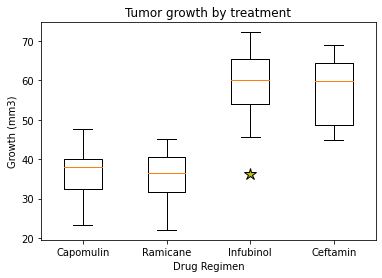

In [193]:
BoxPlot = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_data_X, flierprops  = BoxPlot , labels = treatments_1)
#plt.grid(zorder=1, color ='black')
plt.show()

## Line and Scatter Plots

In [194]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mice_Line = dropped_mouse_dfX.loc[dropped_mouse_dfX["Drug Regimen"] == "Capomulin"]
Mice_Line.value_counts("Mouse ID")
                                  

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [195]:
#Chose mice g288 
Mouse_g288 = dropped_mouse_dfX.loc[dropped_mouse_dfX["Mouse ID"] == "g288"]

In [196]:
#Chose mice g288 
Mouse_x401 = dropped_mouse_dfX.loc[dropped_mouse_dfX["Mouse ID"] == "x401"]

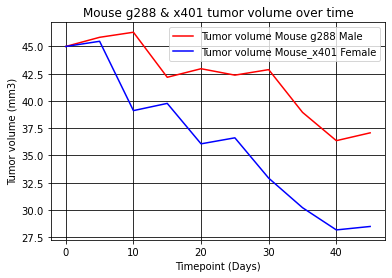

In [197]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Make variables to plot 
tumor_y = Mouse_g288["Tumor Volume (mm3)"]
time_Point = Mouse_g288["Timepoint"]

tumor_y1 = Mouse_x401["Tumor Volume (mm3)"]
time_Point1 = Mouse_x401["Timepoint"]

# Plot line 
plt.plot(time_Point, tumor_y, color="red", label="Tumor volume Mouse g288 Male", linestyle = "solid")
plt.plot(time_Point1, tumor_y1, color="blue", label="Tumor volume Mouse_x401 Female", linestyle = "solid")
plt.legend(loc="upper right")

#Give titles and labels to graph
plt.title( "Mouse g288 & x401 tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_Point), max(tumor_y)+1, 10))
plt.xticks(np.arange(min(time_Point1), max(tumor_y1)+1, 10))
plt.ylabel("Tumor volume (mm3)")
plt.grid(zorder=0, color ='black')

# Print our chart to the screen
plt.show()

In [198]:
Mouse_g288,Mouse_x401

(    Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
 235     g288    Capomulin  Male           3          19          0   
 236     g288    Capomulin  Male           3          19          5   
 237     g288    Capomulin  Male           3          19         10   
 238     g288    Capomulin  Male           3          19         15   
 239     g288    Capomulin  Male           3          19         20   
 240     g288    Capomulin  Male           3          19         25   
 241     g288    Capomulin  Male           3          19         30   
 242     g288    Capomulin  Male           3          19         35   
 243     g288    Capomulin  Male           3          19         40   
 244     g288    Capomulin  Male           3          19         45   
 
      Tumor Volume (mm3)  Metastatic Sites  
 235           45.000000                 0  
 236           45.839400                 0  
 237           46.304003                 1  
 238           42.172301             

In [199]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#All capomulin mice are in cap_mice ( used for the previous excercise)
capomulin_group =Mice_Line.groupby(["Mouse ID"]).mean()
capomulin_group.head()

#Get average tumor volumen
avg_tumor_volume = capomulin_group["Weight (g)"]
avg_weight = capomulin_group["Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor volume in (mm3)')

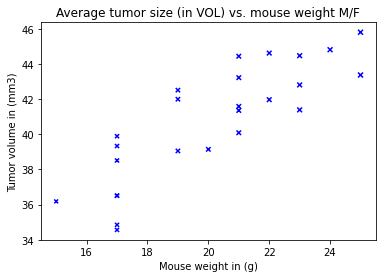

In [200]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(avg_tumor_volume, avg_weight, marker="x", facecolors="blue", s=avg_tumor_vol)
#plt.grid(zorder=.5, color ='black',) alpha=0.9

#Add title and labels to scatter plot 
plt.title( "Average tumor size (in VOL) vs. mouse weight M/F")
plt.xlabel("Mouse weight in (g)")
plt.ylabel("Tumor volume in (mm3)")

## Correlation and Regression

In [201]:
# Calculate the correlation coefficient and linear regression model 

correlation between the two factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


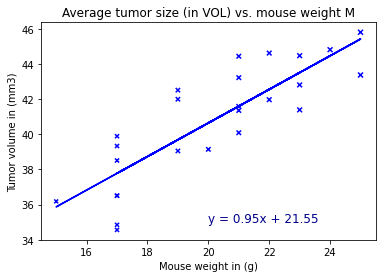

In [207]:
# for mouse weight and average tumor volume for the Capomulin regimen
#Add title and labels to scatter plot 
plt.title( "Average tumor size (in VOL) vs. mouse weight M")
plt.xlabel("Mouse weight in (g)")
plt.ylabel("Tumor volume in (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

#Use the same scatterplot made before 
#Change colors 
plt.scatter(avg_tumor_volume, avg_weight, marker="x", facecolors="blue", s=avg_tumor_volume)
plt.plot(avg_tumor_volume,regress_values,"b-")
plt.annotate(line_eq,(20,35),fontsize=12,color="darkblue")

# Equations for correlation and regression
Correlation = st.pearsonr(avg_tumor_volume,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_volume, avg_weight)
regress_values = avg_tumor_volume * slope + intercept


print(f"correlation between the two factors is {round(Correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)